In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, KernelPCA

In [2]:
ruta = "chicago_taxi_trips_2016_01.csv"
df = pd.read_csv(ruta)
df.head()

,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,85.0,2016-1-13 06:15:00,2016-1-13 06:15:00,180.0,0.40,NaN,NaN,24.0,24.0,4.50,0.00,0.0,0.0,4.50,Cash,107.0,199.0,510.0,199.0,510.0
1,2776.0,2016-1-22 09:30:00,2016-1-22 09:45:00,240.0,0.70,NaN,NaN,NaN,NaN,4.45,4.45,0.0,0.0,8.90,Credit Card,NaN,NaN,NaN,NaN,NaN
2,3168.0,2016-1-31 21:30:00,2016-1-31 21:30:00,0.0,0.00,NaN,NaN,NaN,NaN,42.75,5.00,0.0,0.0,47.75,Credit Card,119.0,NaN,NaN,NaN,NaN
3,4237.0,2016-1-23 17:30:00,2016-1-23 17:30:00,480.0,1.10,NaN,NaN,6.0,6.0,7.00,0.00,0.0,0.0,7.00,Cash,NaN,686.0,500.0,686.0,500.0
4,5710.0,2016-1-14 05:45:00,2016-1-14 06:00:00,480.0,2.71,NaN,NaN,32.0,NaN,10.25,0.00,0.0,0.0,10.25,Cash,NaN,385.0,478.0,NaN,NaN


In [3]:
features = ['taxi_id','trip_seconds','trip_miles',
       'fare', 'tips','tolls', 'extras', 'trip_total',
       'pickup_latitude', 'pickup_longitude']
target = ['payment_type']

In [4]:
aux = df[features].copy()
aux['payment_type'] = df[target]

In [5]:
aux.dropna(inplace = True)

In [6]:
aux.reset_index(drop=True,inplace=True)

In [7]:
aux.head()

,taxi_id,trip_seconds,trip_miles,fare,tips,tolls,extras,trip_total,pickup_latitude,pickup_longitude,payment_type
0,85.0,180.0,0.40,4.50,0.0,0.0,0.0,4.50,199.0,510.0,Cash
1,4237.0,480.0,1.10,7.00,0.0,0.0,0.0,7.00,686.0,500.0,Cash
2,5710.0,480.0,2.71,10.25,0.0,0.0,0.0,10.25,385.0,478.0,Cash
3,1987.0,1080.0,6.20,17.75,0.0,0.0,0.0,17.75,599.0,346.0,Cash
4,6400.0,60.0,0.20,3.75,0.0,0.0,0.0,3.75,527.0,24.0,Cash


In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(aux[features]),
                 columns=features)
X.head()

,taxi_id,trip_seconds,trip_miles,fare,tips,tolls,extras,trip_total,pickup_latitude,pickup_longitude
0,0.009701,0.002085,0.000122,0.000500,0.0,0.0,0.0,0.000450,0.253827,0.649235
1,0.483565,0.005559,0.000335,0.000778,0.0,0.0,0.0,0.000700,0.875000,0.636480
2,0.651678,0.005559,0.000826,0.001139,0.0,0.0,0.0,0.001025,0.491071,0.608418
3,0.226775,0.012509,0.001890,0.001972,0.0,0.0,0.0,0.001776,0.764031,0.440051
4,0.730427,0.000695,0.000061,0.000417,0.0,0.0,0.0,0.000375,0.672194,0.029337


In [9]:
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(X),
                     columns=['PC_1','PC_2'])
df_pca.head()

,PC_1,PC_2
0,-0.263280,-0.486687
1,0.357513,-0.019937
2,-0.015317,0.152528
3,0.275870,-0.275529
4,0.255379,0.228962


In [10]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.42281934, 0.331935  ])

In [11]:
df_pca['target'] = aux[target]

In [12]:
df_pca

,PC_1,PC_2,target
0,-0.263280,-0.486687,Cash
1,0.357513,-0.019937,Cash
2,-0.015317,0.152528,Cash
3,0.275870,-0.275529,Cash
4,0.255379,0.228962,Cash
...,...,...,...
1419714,0.411805,0.179904,Credit Card
1419715,0.216752,-0.356226,Cash
1419716,-0.375984,-0.356144,Credit Card
1419717,-0.336628,-0.277673,Cash


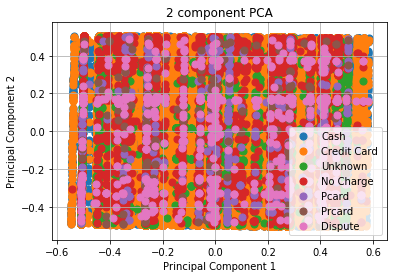

In [13]:

fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2') 
ax.set_title('2 component PCA') 
targets = list(df.payment_type.unique())

for target in targets:
    indicesToKeep = df_pca['target'] == target
    ax.scatter(df_pca.loc[indicesToKeep, 'PC_1']
    , df_pca.loc[indicesToKeep, 'PC_2']
    , s = 50)
ax.legend(targets)
ax.grid()